<a href="https://colab.research.google.com/github/JuanM-GG/modelos-tesis/blob/main/EJEMPLO_2_REAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: 

Autor: 

Fecha: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
FV, caf, ca, k1, k3 = sp.symbols("FV, caf, ca, k1, k3") 

In [4]:
eq = sp.Eq(FV*(caf - ca) - (k1*ca + k3*ca**2),0)

In [5]:
sp.solve(eq, ca)

[(-FV - k1 + sqrt(FV**2 + 4*FV*caf*k3 + 2*FV*k1 + k1**2))/(2*k3),
 -(FV + k1 + sqrt(FV**2 + 4*FV*caf*k3 + 2*FV*k1 + k1**2))/(2*k3)]

In [6]:
def steady_state(FV):

    cas = (-(FV + k1) + np.sqrt((FV + k1)**2 + 4*FV*k3*cafs) )/(2*k3)

    cbs = k1*cas/(FV + k2)

    return [cas, cbs]

In [7]:
# nominal values 
cafs = 10 # mol/L
FVs = 4/7 # min-1
cas = 3 # mol/L
cbs = 1.1170
#parameters 
k1 = 5/6; k2 = 5/3; k3 = 1/6 # L/(mol min)

In [8]:
ca, cb = steady_state(FVs)

In [9]:
print(ca, cb)

3.0 1.1170212765957446


In [10]:
FV = np.linspace(0,5,100)
ca, cb = steady_state(FV)

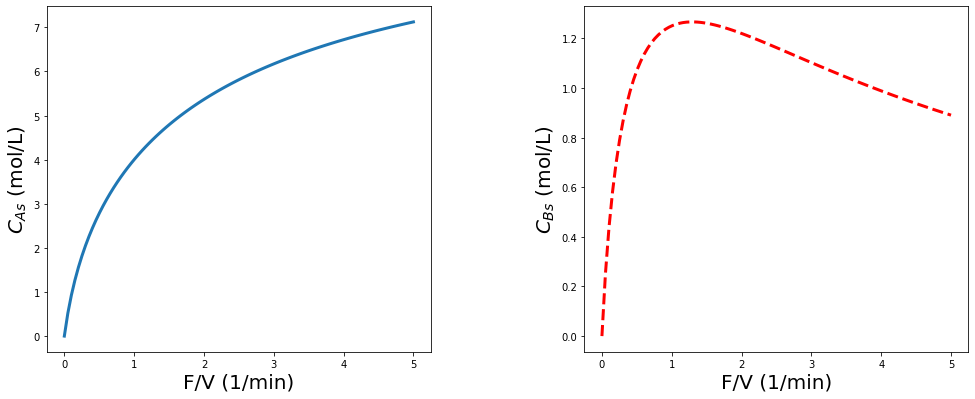

In [28]:
plt.figure(figsize= (16,6))
plt.subplot(1,2,1)
plt.plot(FV, ca, linewidth = 3)
plt.xlabel("F/V (1/min)", size = 20)
plt.ylabel("$C_{As}$ (mol/L)", size = 20)
plt.subplot(1,2,2)
plt.plot(FV, cb,"r--", linewidth = 3)
plt.xlabel("F/V (1/min)", size = 20)
plt.ylabel("$C_{Bs}$ (mol/L)", size = 20)

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)

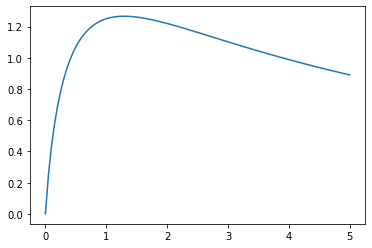

In [12]:
plt.plot(FV, cb)

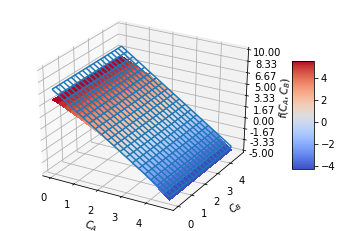

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
CA = np.arange(0, 5, 0.25)
CB = np.arange(0, 5, 0.25)
CA, CB = np.meshgrid(CA, CB)
f = FVs*(cafs - CA) - (k1*CA + k3*CA**2)
fl = -(FVs + k1 + 2*k3*cas)*(CA - cas)

# Plot the surface.
surf = ax.plot_wireframe(CA, CB, fl)
surf = ax.plot_surface(CA, CB, f, cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-5, 10.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add labels
ax.set_xlabel('$C_A$')
ax.set_ylabel('$C_B$')
ax.set_zlabel('$f(C_A, C_B)$')


plt.show()

In [14]:
def model(s,t,FV):

    # state variables 
    ca = s[0]
    cb = s[1]

    # component balances 
    dca = FV*(cafs - ca) - (k1*ca + k3*ca**2)
    dcb = -FV*cb + k1*ca - k2*cb

    return [dca,dcb]

In [15]:
# initial state 
s = [0,0]
# integration time 
t = np.linspace(0,5,100)

In [16]:
out = odeint(model, s, t, args=(FVs, ))

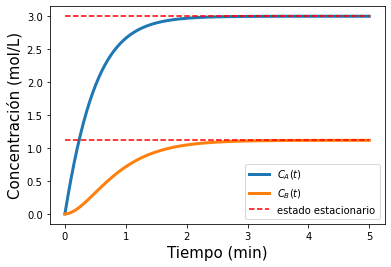

In [17]:
plt.plot(t, out, linewidth = 3)
plt.plot(t, np.ones(len(t))*cas,"r--",t, np.ones(len(t))*cbs, "r--")
plt.xlabel("Tiempo (min)", size = 15)
plt.ylabel("Concentración (mol/L)", size = 15)
plt.legend(["$C_A(t)$", "$C_B(t)$", "estado estacionario"])

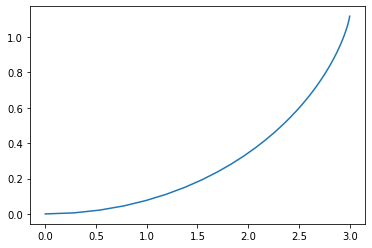

In [18]:
plt.plot(out[:,0],out[:,1])

In [19]:
def nullclines(FV):

    # nullcline cbdt = 0
    ca2 = np.linspace(0,5,100)
    cb2 = k1*ca2/(FV + k2)
    plt.plot(ca2, cb2, "b")

    # nullcline cadt = 0
    ca1 = (-(FV + k1) + np.sqrt((FV + k1)**2 + 4*FV*k3*cafs) )/(2*k3)
    plt.plot([ca1,ca1], plt.ylim(),"r")

    # trajectory 
    out = odeint(model, s, t, args=(FV, ))
    plt.plot(out[:,0],out[:,1], "g--")


    # steady state 
    cas = ca1
    cbs = k1*cas/(FV + k2)
    plt.plot(cas,cbs, "r.", ms = 10)


    plt.xlabel("$C_A$ (mol/L)", size = 15)
    plt.ylabel("$C_B$ (mol/L)", size = 15)

    plt.legend(["$dC_Adt = 0$", "$dC_Bdt = 0$", "trayectoria", "estado estacionario"])

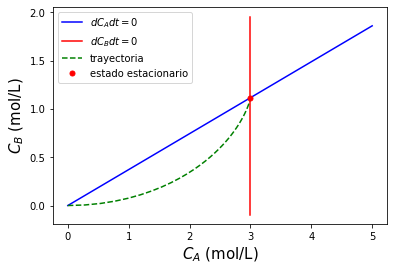

In [20]:
nullclines(FVs)